In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv("bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

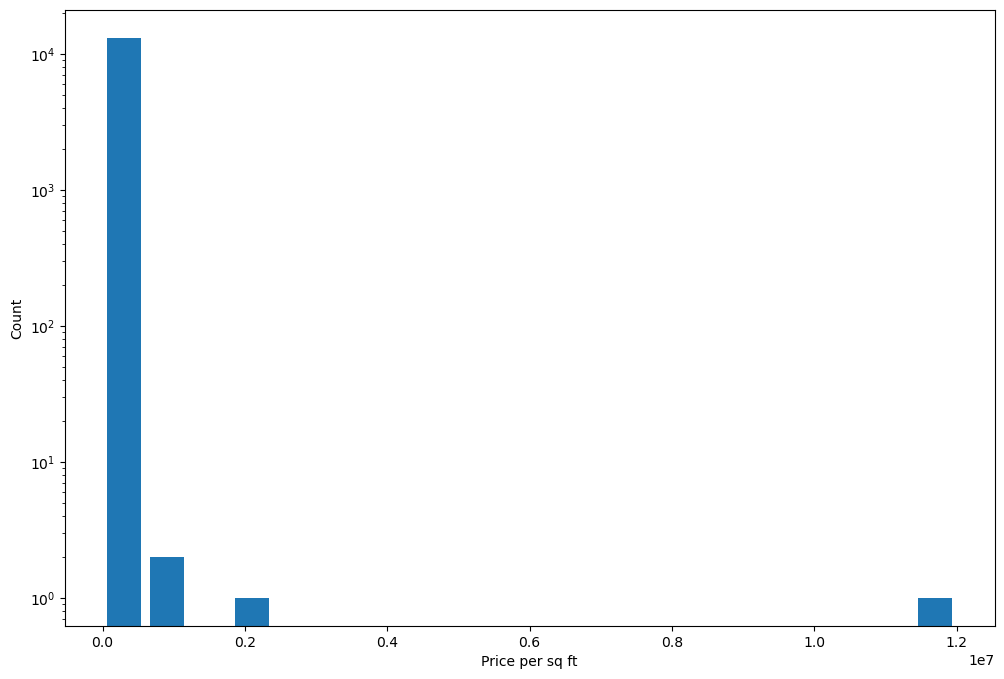

In [8]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sq ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [9]:
#Treat outliers using percentile first

lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [10]:
outliers = df[(df.price_per_sqft > upper_limit) | (df.price_per_sqft < lower_limit)]
outliers.sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
12355,other,4 BHK,16335.0,4.0,149.0,4,912
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
7799,other,4 BHK,2000.0,3.0,1063.0,4,53150
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
7012,other,1 BHK,650.0,1.0,500.0,1,76923


In [12]:
df2 = df[(df.price_per_sqft < upper_limit) & (df.price_per_sqft > lower_limit)]
df2.shape

(13172, 7)

In [13]:
df.shape

(13200, 7)

In [14]:
df.shape[0] - df2.shape[0]

28

In [15]:
#Now remove outliers using 4 std deviations

max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()
max_limit, min_limit

(23227.73653589429, -9900.429065502549)

In [16]:
df2[(df2.price_per_sqft > max_limit) | (df2.price_per_sqft < min_limit)].sample(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
2632,other,4 Bedroom,2400.0,4.0,700.0,4,29166
10327,Cunningham Road,4 Bedroom,7500.0,6.0,1800.0,4,24000
3873,other,5 Bedroom,1250.0,5.0,300.0,5,24000
8595,other,3 Bedroom,1200.0,2.0,300.0,3,25000
4993,other,6 Bedroom,825.0,6.0,400.0,6,48484
4555,Judicial Layout,6 Bedroom,1200.0,6.0,300.0,6,25000
4609,other,4 Bedroom,1800.0,5.0,500.0,4,27777
7643,other,4 BHK,5422.0,6.0,1900.0,4,35042
3605,other,4 Bedroom,2700.0,6.0,675.0,4,25000
1281,Chamrajpet,9 Bedroom,4050.0,7.0,1200.0,9,29629


In [17]:
df3 = df2[(df2.price_per_sqft > min_limit) & (df2.price_per_sqft < max_limit)]
df3.shape

(13047, 7)

In [18]:
df2.shape[0]-df3.shape[0]

125

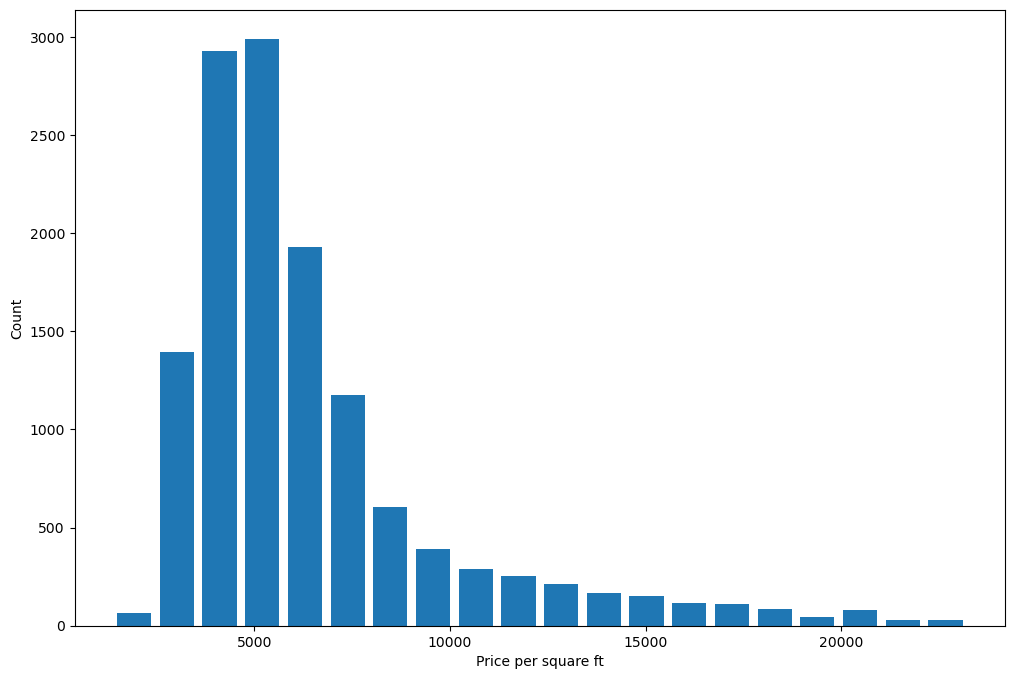

In [19]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

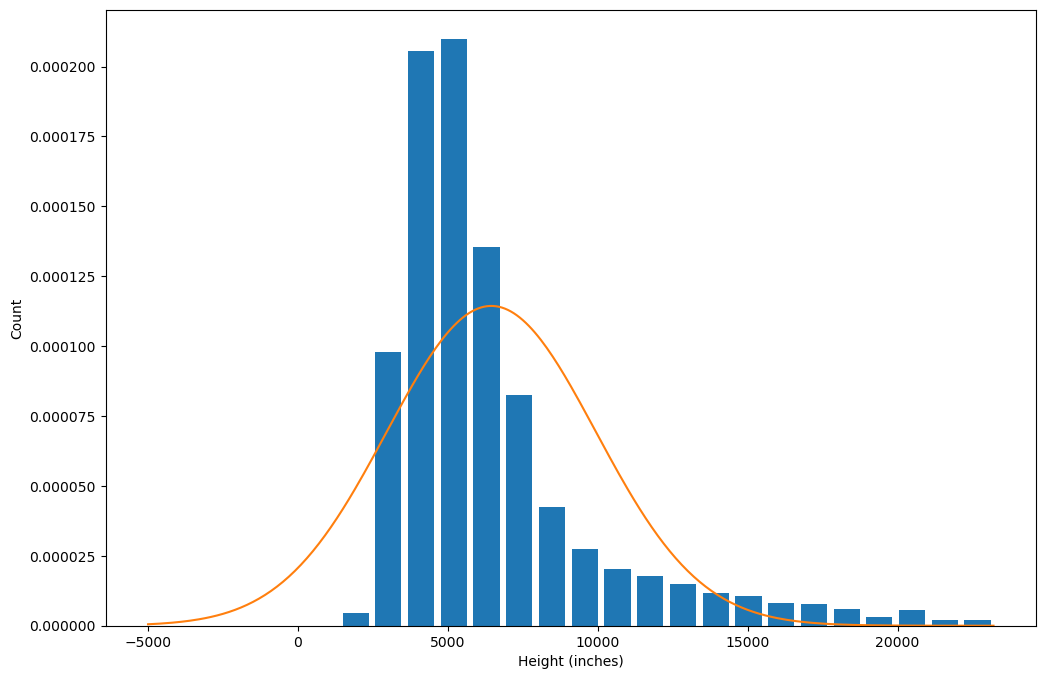

In [21]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

In [22]:
#Now remove outliers using z score. Use z score of 4 as your thresold

df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()
df2.sample(10)

C:\Users\HP ADMIN\AppData\Local\Temp\ipykernel_5132\708014214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean())/df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9518,other,2 BHK,1275.0,2.0,69.00,2,5411,-0.302499
7309,Harlur,2 BHK,1133.0,2.0,55.00,2,4854,-0.437007
3096,other,2 BHK,1326.0,2.0,62.17,2,4688,-0.477093
67,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.00,8,6296,-0.088783
2848,other,2 BHK,780.0,2.0,25.00,2,3205,-0.835218
12605,Whitefield,3 BHK,1740.0,3.0,85.00,3,4885,-0.429521
2430,Rayasandra,7 Bedroom,700.0,6.0,85.00,7,12142,1.322946
9522,Sarjapura - Attibele Road,5 Bedroom,3750.0,6.0,295.00,5,7866,0.290350
727,Banashankari,2 BHK,1077.0,2.0,37.64,2,3494,-0.765428
3237,Vasanthapura,2 BHK,420.0,2.0,35.00,2,8333,0.403124


In [23]:
outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outliers_z.shape

(125, 8)

In [24]:
outliers_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
8483,HSR Layout,8 Bedroom,800.0,8.0,285.0,8,35625,6.993770
13078,other,4 Bedroom,9200.0,4.0,2600.0,4,28260,5.215223
6709,Malleshwaram,4 Bedroom,4000.0,4.0,1100.0,4,27500,5.031693
9419,HSR Layout,9 Bedroom,1200.0,9.0,350.0,9,29166,5.434010
8499,other,4 BHK,7400.0,5.0,1850.0,4,25000,4.427977


In [25]:
df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape

(13047, 8)

In [26]:
df2.shape[0] -df4.shape[0]

125